In [8]:
from sklearn.datasets import load_wine, make_classification,make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

warnings.filterwarnings("ignore")

%matplotlib inline


---- Classification Task ----


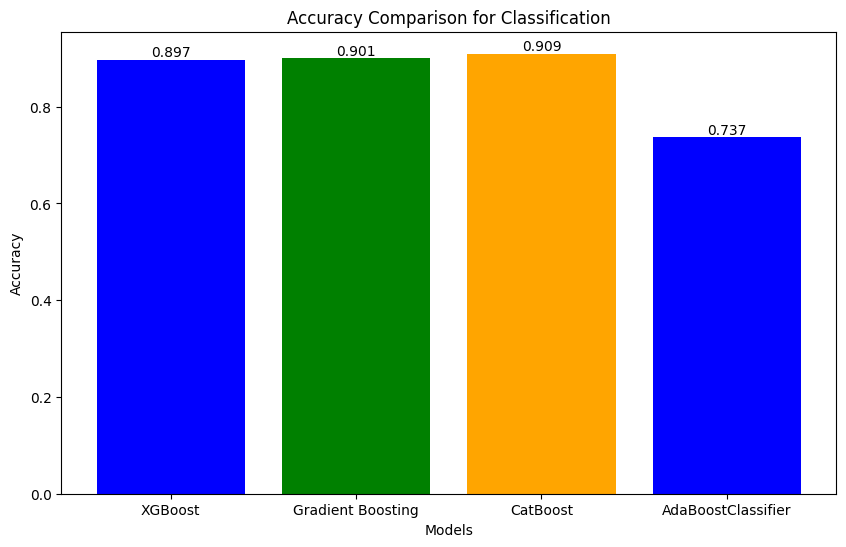

In [9]:
# Function to plot comparison
def plot_comparison(models, metrics, task, metric_name):
    plt.figure(figsize=(10, 6))
    plt.bar(models, metrics, color=["blue", "green", "orange"])
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} Comparison for {task}")
    for i, val in enumerate(metrics):
        plt.text(i, val, f"{val:.3f}", ha='center', va='bottom')
    plt.show()

# ---- Classification ----
print("---- Classification Task ----")

# Load Wine dataset

X, y = make_classification(
    n_samples=10000,    # Number of samples
    n_features=20,     # Number of features
    n_informative=20,  # Number of informative features
    n_redundant=0,     # Number of redundant features
    random_state=42
)
learni = .1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost Classifier
xgb_clf = XGBClassifier(learning_rate=learni, max_depth=3, n_estimators=100, use_label_encoder=False, random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(learning_rate=learni, max_depth=3, n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

# CatBoost Classifier
cb_clf = CatBoostClassifier(iterations=100, learning_rate=learni, depth=3, loss_function='MultiClass', random_seed=42, verbose=0)
cb_clf.fit(X_train, y_train)
cb_pred = cb_clf.predict(X_test)
cb_accuracy = accuracy_score(y_test, cb_pred)

adb_clf = AdaBoostClassifier(n_estimators=100, learning_rate=learni, random_state=42)
adb_clf.fit(X_train, y_train)
adb_pred = adb_clf.predict(X_test)
adb_accuracy = accuracy_score(y_test, adb_pred)

# Classification Comparison Plot
plot_comparison(["XGBoost", "Gradient Boosting", "CatBoost","AdaBoostClassifier"], [xgb_accuracy, gb_accuracy, cb_accuracy,adb_accuracy], "Classification", "Accuracy")



---- Regression Task ----


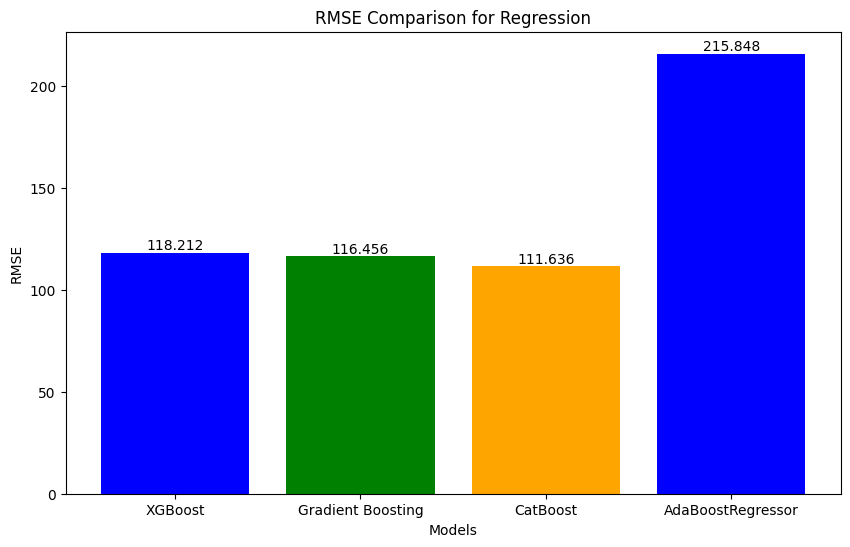


---- Summary ----
Classification Accuracy:
XGBoost: 0.90, Gradient Boosting: 0.90, CatBoost: 0.91

Regression RMSE:
XGBoost: 118.21, Gradient Boosting: 116.46, CatBoost: 111.64
Regression R2:
XGBoost: 0.8393, Gradient Boosting: 0.8441, CatBoost: 0.8567


In [10]:

# ---- Regression ----
print("\n---- Regression Task ----")

# Load California Housing dataset
X, y = make_regression(
    n_samples=10000,    # Number of samples
    n_features=20,     # Number of features
    n_informative=20,  # Number of informative features
   
       # Number of redundant features
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost Regressor
xgb_reg = XGBRegressor(learning_rate=learni, max_depth=3, n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(learning_rate=learni, max_depth=3, n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)
# CatBoost Regressor
cb_reg = CatBoostRegressor(iterations=100, learning_rate=learni, depth=3, loss_function='RMSE', random_seed=42, verbose=0)
cb_reg.fit(X_train, y_train)
cb_pred = cb_reg.predict(X_test)
cb_rmse = np.sqrt(mean_squared_error(y_test, cb_pred))
cb_r2 = r2_score(y_test, cb_pred)
adb_reg = AdaBoostRegressor(n_estimators=100, learning_rate=learni, random_state=42)
adb_reg.fit(X_train, y_train)
adb_pred = adb_reg.predict(X_test)
adb_rmse = np.sqrt(mean_squared_error(y_test, adb_pred))
adb_r2 = r2_score(y_test, adb_pred)


# Regression Comparison Plot
plot_comparison(["XGBoost", "Gradient Boosting", "CatBoost","AdaBoostRegressor"], [xgb_rmse, gb_rmse, cb_rmse,adb_rmse], "Regression", "RMSE")

# ---- Summary ----
print("\n---- Summary ----")

# Classification Results
print("Classification Accuracy:")
print(f"XGBoost: {xgb_accuracy:.2f}, Gradient Boosting: {gb_accuracy:.2f}, CatBoost: {cb_accuracy:.2f}")

# Regression Results
print("\nRegression RMSE:")
print(f"XGBoost: {xgb_rmse:.2f}, Gradient Boosting: {gb_rmse:.2f}, CatBoost: {cb_rmse:.2f}")
print("Regression R2:")
print(f"XGBoost: {xgb_r2:.4f}, Gradient Boosting: {gb_r2:.4f}, CatBoost: {cb_r2:.4f}")
